# CSCI 3202, Spring 2023
# Hill Climbing Notebook

Before we begin, let's load a few packages that we might find useful.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

<br>

<img src="http://1.bp.blogspot.com/-mWUxSF7q_JY/Vbd84OcwaSI/AAAAAAAA7No/5iT8gMZBHw8/s1600/seilschaft2---helliventures-joachimhellinger.jpg=" width="300"/>



## Problem 1: Hill-climbing

The over-arching goal here is to maximize some objective function.  You can also look at this as minimizing some kind of a loss... and you will!

In many applications, the objective function might turn out to be a Gaussian function, such as this one:

In [2]:
def gaussian_objective(state):
    return stats.norm.pdf(x=state, loc=5, scale=2)

Note the this objective function is just taking in some value $\texttt{state}$ and returning the value of the normal probability density function, centered at $\texttt{loc} = \mu = 5$ and with standard deviation $\texttt{scale} = \sigma = 2$:
$$f(\texttt{state}) = \dfrac{1}{\sqrt{2\pi}\sigma} e^{-\dfrac{(\texttt{state}-\mu)^2}{2\sigma^2}}$$

For good measure, let's plot this thing up and see what it looks like.

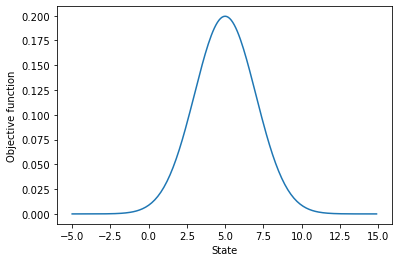

In [3]:
x = np.arange(-5,15,0.1)
f = [gaussian_objective(state) for state in x]

plt.plot(x,f)
plt.xlabel('State')
plt.ylabel('Objective function')
plt.show()

Notes:
- unimodal aka 1 max  

Neat.

<br>

The first order of business if we want to maximize some objective function using the **local search** techniques we just learned will be to set up a class structure to make this easier.

If we do this in a general enough way for **hill-climbing** (this first part), we will only need to modify a few things to tackle a trickier problem using **simulated annealing**.



### (1a)  A class structure to solve problems

So first, let's define a class to keep track of the `state`.  This is the quantity we want to adjust in order to optimize the objective function.  That sentence indicates the two values we really need to keep track of for a `state`:
1. the value of `state`
2. the value of the `objective_function` when evaluated at `state`

In [47]:
class state:

    def __init__(self, node, value):
        self.node = node
        self.value = value    
        
#we really only need current, left and right but we are going to keep everything until now

Now we need to define our problem.  This should be entirely self-contained, so that we need to feed the `hill_climb` optimization routine below a fairly generic problem description, and it can solve it, so we can easily feed in different problems.

**The goal** with this class structure is to have everything that is **problem-specific** sent into the hill-climbing optimization/local search be self-contained within the `problem` object.

In [48]:
class problem:
    
    def __init__(self, initial, objective_function, stepsize):
        self.initial_state = initial  #since answer depends on where you start 
        self.current_state = initial
        self.objective_function = objective_function
        self.stepsize = stepsize #how far to right or left each time 
        #good idea to choose a % of the range 
        
    def moves(self):
        '''return all possible moves to make from the current_state'''
        all_moves = []
        # could move right...
        all_moves.append(self.current_state.node + self.stepsize)
        # ... or left!
        all_moves.append(self.current_state.node - self.stepsize)
        return all_moves

Finally, we can turn our Hill-climbing pseudocode into real code, that takes only two arguments and returns the `state` that optimizes the `objective_function`.  Note that the return can be done implicitly by manipulating the current state within our `problem`, or we could code it up as an explicit output.

So when do we stop? Well theyres no great rule- lots of guessing 
here we specify # iter and pick large number bc once it gets to taht big # it probably got max
then once we hit that iter we see what the max is for all those 

in this implementation we save all the steps every time we do it so we can see when the max was, we could also do some sort of error function to save memory  

In [51]:
def hill_climb(problem, n_iter):
    
    # iterate until we can't do any better
    for k in range(n_iter):
        nextMove, nextValue = problem.best_move()
        if nextValue <= problem.current_state.value:
            return problem.current_state
        #print(problem.current_state, nextMove)
        problem.current_state.node, problem.current_state.value = nextMove, nextValue
    print('reached n_iter')
    return False

class problem_hillclimb(problem):
    
    def best_move(self):
        '''return the best move possible from the current_state'''
        # what moves are possible?
        all_moves = self.moves()
        # what is objective function for each of them?
        obj_func = [self.objective_function(move) for move in all_moves]
        
        ##zip puts x,y in a tuple
        best = all_moves[max(zip(obj_func, range(len(obj_func))))[1]] #find best of all moves
        return best, np.max(obj_func)



### (1b)  Ready to solve!

Let's start by creating an `initial_state` for our problem.

In [52]:
initial_state = state(node=1, value=gaussian_objective(1))
#easy bc unimodal 
# for this function it is unusual we can pick any starting number and get the max since it is unimodal

Now we need an instance of our `problem`.

In [53]:
gaussian_problem = problem_hillclimb(initial=initial_state, objective_function=gaussian_objective, stepsize=0.1)

Finally, we can turn out `hill_climb` algorithm loose on this problem.

In [54]:
out = hill_climb(gaussian_problem, n_iter=50)
print(out.node, out.value)

4.999999999999999 0.19947114020071635


## A couple extensions

That's good and all, but that particular objective function was just a single univariate Gaussian.  It turns out that the real world is tougher than that.  So let's tackle some tougher problems, shall we?



### (1c) Minimization

First, it might be the case that we want to ***minimize*** an objective function instead of maximizing it.  Modify your hill-climbing codes to tackle the problem of minimization.  Note:  this ought to be do-able by modifying a single line of code from above...

In [79]:
def hill_climb_min(problem, n_iter):
    
    # iterate until we can't do any better
    for k in range(n_iter):
        nextMove, nextValue = problem.best_move()
        if nextValue <= problem.current_state.value:
            return problem.current_state
        #print(problem.current_state, nextMove)
        problem.current_state.node, problem.current_state.value = nextMove, nextValue
    print('reached n_iter')
    return False

class problem_hillclimb_min(problem):
    
    def best_move(self):
        '''return the best move possible from the current_state'''
        # what moves are possible?
        all_moves = self.moves()
        # what is objective function for each of them?
        obj_func = [self.objective_function(move) for move in all_moves]
        
        best = all_moves[max(zip(obj_func, range(len(obj_func))))[1]] #find best of all moves
        return best, np.min(obj_func)
    ##for MINIMUM only thing we actually change is np.max --> np.min

In [80]:
initial_state = state(node=1, value=gaussian_objective(1))
gaussian_problem = problem_hillclimb_min(initial=initial_state, objective_function=gaussian_objective, stepsize=0.1)

In [81]:
out = hill_climb_min(gaussian_problem, n_iter=50)
print(out.node, out.value)

1 0.02699548325659403


Now **define your own** objective function to minimize!  Easy options include concave-up quadratic functions just slapping a $-$ sign into the Gaussian objective function defined above.  Then turn your descent algorithm loose on the minimization problem.


### (1d)  Random restarts

That single Gaussian actually covers many real-world applications of optimization and local search, but many other applications lead to "bumpier" objective functions.  Suppose you are trying to fit a model to noisy data, and suppose each of your data points has normally-distributed uncertainty.  Then the objective function you would like to minimize could take the form of the sum of several Gaussian distributions, like so:

$$f(\texttt{state}) = \dfrac{1}{\sqrt{2\pi}\sigma} \left(e^{-\dfrac{(\texttt{state}-\mu_0)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_1)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_2)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_3)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_4)^2}{2\sigma^2}}\right)$$

Here, $\mu_i$ denotes the data points you have, $\sigma$ is assumed to be an uncertainty shared by all of them, and $\texttt{state}$ is your model's output, which you want to fit through those data points.

If we let $\sigma=1$, $\mu_0 = 0$, $\mu_1 = 2.1$, $\mu_2 = 4$, $\mu_3 = 4$ and $\mu_4 = 8$, then we end up with the following objective function, `several_gaussian_objective(state)`:

In [82]:
def several_gaussian_objective(state):
    locs = [0,2.1,4,4,8] # centers of a bunch of normal distributions
    #locs = [0, 2, 4, 6, 8]
    objective_value = 0
    # objective function is actually just the sum of a bunch of normal pdfs
    for loc in locs:
        objective_value += stats.norm.pdf(state, loc=loc, scale=1)
    return objective_value

Plot up this new objective function as a function of `state`.  What do you notice?  Will our "vanilla" hill-climbing routine successfully climb the hill and maximize this objective function for *any* initial state?

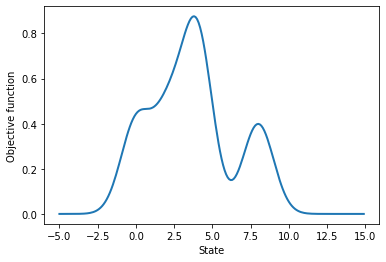

In [83]:
x = np.arange(start=-5, stop=15, step=0.1)
fx = [several_gaussian_objective(xk) for xk in x]
plt.plot(x, fx, lw=2)
plt.xlabel('State')
plt.ylabel('Objective function')
plt.show()

notice:

has a shelf and 
local maxes 
yikes


Note that we can check about where the global maximum is fairly easily:

In [87]:
max(zip(fx, x))

(0.8764853553213469, 3.7999999999999687)

Let's modify our vanilla hill-climbing solution approach from **(1b)** to include 500 random restarts for the initial state.

The following code will draw `n_restarts` random samples from the range $[0, 1)$.

In [88]:
n_restarts = 500
sample = np.random.random(size=n_restarts)

Modify that to draw instead from the range $[-2, 10)$.  Use those samples to create an **ensemble** of the values of `state` for which the objective function is maximized.  Plot a histogram of them, and make a conclusion about what the "best guess" for the maximal `state` is.

[ 7.97029945e+00  8.40258458e+00  1.71433284e+00  9.58799693e+00
 -8.51071148e-01  5.58572764e-01  6.09768812e+00  2.40647600e-01
  4.52681815e+00  5.33048611e+00  4.29153680e+00  8.75881345e+00
  6.13088071e+00  8.30822169e+00  3.08579756e-01  3.92098026e+00
  3.94206473e+00  6.73605812e+00  4.46855647e+00  3.42227033e+00
  2.79538923e+00  7.71097679e+00 -1.46815659e+00 -1.31750604e+00
  6.71642658e+00 -6.85058111e-01  4.62159298e+00  4.36213076e+00
  6.01308079e+00  7.59896707e+00  1.45196767e+00  8.04271990e+00
  5.50580084e+00  6.61599127e+00 -9.22693060e-01  4.68028548e+00
  5.84279703e+00  7.49138767e+00  1.61972195e+00  1.64971892e+00
  1.21393928e+00  6.80450364e+00 -1.49114245e+00  9.80373445e+00
  4.65111931e+00 -3.36130821e-01 -3.88309935e-02  8.09039216e+00
  7.99968548e+00 -5.01293194e-01  3.49293521e+00  4.34928687e-01
  4.09596990e-01  8.77829010e+00  7.25230495e+00  4.70581716e-01
  2.31071656e+00  7.32610684e+00  3.96197321e+00  7.31035493e-01
  4.29125771e+00  2.50382

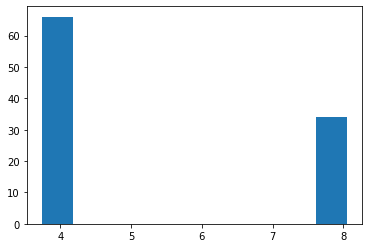

In [89]:
n_restarts = 100 ##at every one of these 100 random points we get 100 max values the plot and see 
max_found = []
range_init = [-2, 10]
initial_values = np.random.random(size=n_restarts)*np.diff(range_init)+range_init[0]
#initial_values = np.random.uniform(-2,10,size=n_restarts)
print(initial_values)

for n in range(n_restarts):
    initial_state = state(node=initial_values[n], value=several_gaussian_objective(initial_values[n]))
    gaussian_problem = problem_hillclimb(initial=initial_state, objective_function=several_gaussian_objective, stepsize=0.1)
    out = hill_climb(gaussian_problem, n_iter=500)
    max_found.append(out.node)
    
print(max_found)
plt.hist(max_found)
plt.show()

Now we see the 2 output maxes. This tells us we found 1 max max and 1 local max depending on the initial of where we started 

we can find true max by seeing which is bigger

so obviously the moral is that where you end depends on where you start

almost every method requires a really good starting value, unless your data is really easy and NOt noisy